In [7]:
import numpy as np
from numpy import array, random, dot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

### Training Data

In [9]:
X, Y = datasets.make_moons()

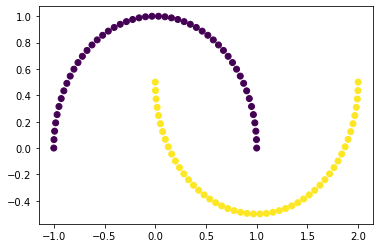

In [27]:
plt.scatter(X[:, 0], X[:, 1],c=[Y], cmap='viridis')
plt.show()

## Neuron
- Z = W.X + B
- A = sigmoid(Z)
- loss = binary cross-entropy, (-y * log(A) - (1-y) * log (1-A)
- dloss/dA = y * (A-1) + (1-y) * A
- dA/dZ = 1
- dZ/dW = X
- dZ/dB = 1

## Shapes
- input = 1x2
- W = 1x2, B = 1x1
- Z = 1x1
- A = sigmoid(Z)
- loss binary cross-entropy
    - (-y * log(A) - (1-y) * log (1-A)

In [17]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [21]:
def training(X, Y, lr = 0.01, epochs = 10):
    W = np.random.uniform(-1,1, size=(1,2))
    b = np.random.uniform(-1,1, size=(1,1))

    Z = np.zeros(shape=(1,1))
    A = np.zeros(shape=(1,1))
    
    epoch_loss = []
    
    for epoch in range(epochs):
        epoch_loss.append(0)
        for i, x in enumerate(X):
            Z = dot(x, W.T) + b
            A = sigmoid(Z)
            
            loss_i = - Y[i] * np.log(A) - (1-Y[i]) * np.log(1-A) # binary CE
            
            epoch_loss[epoch] += loss_i.flatten()
            dA =  Y[i] * (A-1) + (1 - Y[i]) * A
            dZ = A * (1 - A)
            dW = dA * dZ * x
            db = dA * dZ * 1
        
            W = W - lr * dW
            b = b - lr * db
        #print(epoch_loss[-1])
    plt.plot(epoch_loss)
    print('last loss', epoch_loss[-1])
    return W, b

last loss [32.03766324]


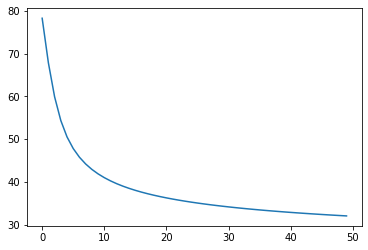

In [26]:
W, b = training(X, Y, lr = 0.02, epochs=50)

In [34]:
def evaluate(X, W, b, threshold = 0.5):
    y_hat = []
    for i, x in enumerate(X):
        Z = dot(x, W.T) + b
        A = sigmoid(Z)
        y_hat.append(A)
        
    return np.array(y_hat) > threshold

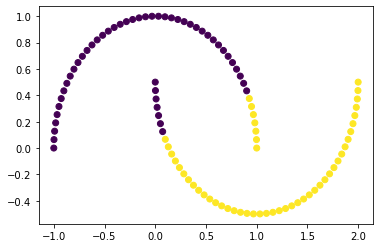

In [40]:
y_hat= evaluate(X, W, b, threshold=0.5)
plt.scatter(X[:, 0], X[:, 1],c=[y_hat])
plt.show()